# Домашнее задание "Функции потерь и оптимизация"

Реализовать самостоятельно логистическую регрессию.

Обучить ее методом градиентного спуска.

Методом nesterov momentum.

Методом rmsprop.

In [1]:
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt


In [2]:
X, y = make_blobs(n_samples=100, centers=[[-2, 0.5], [2, -0.5]], n_features=2, random_state=42)


In [3]:
X.shape

(100, 2)

In [4]:
y

array([1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0])

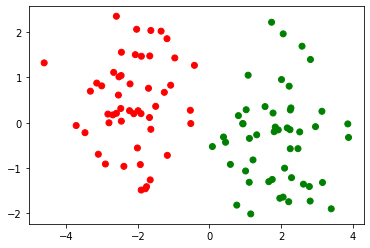

In [5]:


colors = ['red', 'green']

colored_y = np.zeros(y.size, dtype=str)

for i, cl in enumerate([0,1]):
    colored_y[y == cl] = str(colors[i])
    
plt.scatter(X[:, 0], X[:, 1], c=colored_y)

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    train_size=0.7,
                                                    stratify=y)

In [7]:
np.mean(y_train), np.mean(y_test)

(0.5, 0.5)

Логистическая регрессия

Вычисление предсказания логистической регрессией для объекта $x_i \in \mathbb{R}^n$ :

$z = w^T x_i + b, \quad w \in \mathbb{R}^n, b \in \mathbb{R}$

$y_{pred} = a = \sigma (z)$

Сигмоида

$$\sigma(x) = \frac{1}{1 + e^{-x}}$$
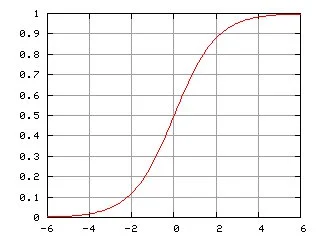

Логистическая фунция потерь:

$$L_i(a) = -y_i \cdot log(a) - (1 - y_i) \cdot log(1 - a)$$
Производные функции по параметрам:

$$\frac{\partial L_i}{\partial w} = (a-y_i) \cdot x_i $$$$
\frac{\partial L_i}{\partial b} = a-y_i $$
Используются для минимизации функции потерь $L$ с помощью градиентного спуска.

In [8]:
m, n = X_train.shape

w = np.random.randn(n)
b = np.random.randn()


In [9]:
# def log_loss(y_true, y_pred):
#     return -np.sum(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred), axis=0) / len(y_true)

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# def predict(x, w, b):
#     return np.array(sigmoid(np.dot(w, x) + b)) >= threshold


### Логистическая регрессия (Метод стохастического градиентного спуска)

In [10]:
EPOCHS = 12
LEARNING_RATE = 0.0001
threshold = 0.5

losses = []
y_preds = []
w = np.random.randn(n)
b = np.random.randn()

for _ in range(EPOCHS):
    # предсказание модели
    y_pred = np.array(sigmoid(-1*(X_train.dot(w.T) + b)))
    y_preds.append(y_pred)
                      
    # функция потерь
    log_loss = -np.sum(y_train * np.log(y_pred) + (1 - y_train) * np.log(1 - y_pred), axis=0) / len(y_train)
    losses.append(log_loss)
    
    i = np.random.choice(len(X_train))
    current_prediction = sigmoid(X_train[i].dot(w) + b)

    b -= LEARNING_RATE * (current_prediction - y_train[i])
    w -= LEARNING_RATE * ((current_prediction - y_train[i]) * X_train[i])

In [11]:
w, b

(array([-0.89158189, -0.20755856]), -0.8043034968060061)

In [12]:
# predict_proba
y_pred

array([0.59497715, 0.89176905, 0.93692755, 0.94333119, 0.23041182,
       0.3392865 , 0.96859265, 0.45473915, 0.5829367 , 0.82078158,
       0.93068713, 0.28501609, 0.40663377, 0.87278628, 0.12150366,
       0.95064066, 0.20013134, 0.18667659, 0.28194716, 0.38666751,
       0.9087907 , 0.3347196 , 0.80451862, 0.20727296, 0.95261531,
       0.84912617, 0.83605294, 0.23473403, 0.75159946, 0.15602026,
       0.53251125, 0.92315997, 0.1080997 , 0.7531461 , 0.11719765,
       0.87927682, 0.24770752, 0.50445512, 0.15437716, 0.26944067,
       0.94154778, 0.94605195, 0.74816767, 0.75669757, 0.93810553,
       0.2054729 , 0.84797535, 0.98525999, 0.07374948, 0.44167293,
       0.13893834, 0.66637397, 0.68297471, 0.8368488 , 0.91808888,
       0.90121184, 0.95046605, 0.0875905 , 0.15268828, 0.36414619,
       0.32481668, 0.97367459, 0.96600947, 0.26091831, 0.97489256,
       0.26345742, 0.91490705, 0.22415647, 0.95307433, 0.98588356])

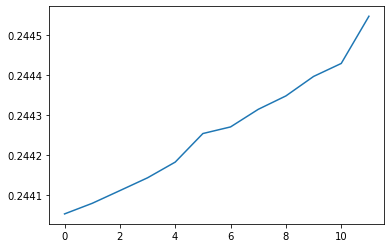

In [13]:
plt.plot(losses)

In [14]:
# присвоение класса [0,1] по предсказанной вероятности
y_pred = [1 if k > threshold else 0 for k in y_pred]

# точность модели
accuracy_score(y_train, y_pred)

0.9285714285714286

### Логистическая регрессия (Метод Nesterov momentum)

In [15]:
EPOCHS = 12
LEARNING_RATE = 0.0001
gamma = 0.9
threshold = 0.5

losses = []
y_preds = []
vt_b = []
vt_w = []
w = np.random.randn(n)
b = np.random.randn()
vt_b = [0 for _ in range(len(X_train))]
vt_w = [0 for _ in range(len(X_train))]

for i in range(EPOCHS):
    # предсказание модели
    y_pred = np.array(sigmoid(-1*(X_train.dot(w.T) + b)))
    y_preds.append(y_pred)
                      
    # функция потерь
    log_loss = -np.sum(y_train * np.log(y_pred) + (1 - y_train) * np.log(1 - y_pred), axis=0) / len(y_train)
    losses.append(log_loss)
    
    i = np.random.choice(len(X_train))
    current_prediction = sigmoid(X_train[i].dot(w) + b)
    
    vt_b[i] = gamma*vt_b[i] + LEARNING_RATE*np.sum(current_prediction- y_train[i]) / len(y_train)
    vt_w[i] = gamma*vt_w[i] + LEARNING_RATE*np.sum((current_prediction - y_train[i])*X_train[i]) / len(y_train)

    b -= vt_b[i]
    w -= vt_w[i]

In [16]:
w, b

(array([0.76468785, 0.80597161]), 0.1806166165836193)

In [17]:
# predict_proba
y_pred

array([0.5017445 , 0.37475485, 0.19093427, 0.03567408, 0.9225513 ,
       0.73269015, 0.08499183, 0.56044249, 0.55807568, 0.50767779,
       0.2778064 , 0.75601094, 0.47656663, 0.27404613, 0.94149754,
       0.07347731, 0.84230862, 0.83755804, 0.89128856, 0.66315326,
       0.39405066, 0.76659466, 0.63678781, 0.81181187, 0.23523947,
       0.3197263 , 0.2938066 , 0.70422222, 0.66888009, 0.86256123,
       0.31677192, 0.17901921, 0.94024462, 0.45599082, 0.85848396,
       0.135505  , 0.88518152, 0.31496131, 0.87744118, 0.69549367,
       0.14457714, 0.25075263, 0.44359268, 0.52855334, 0.14804838,
       0.72520169, 0.38971977, 0.05264742, 0.93807947, 0.36119163,
       0.82099757, 0.29310266, 0.54528139, 0.29392888, 0.38539955,
       0.41616367, 0.28149625, 0.93441375, 0.81260053, 0.62455552,
       0.54785772, 0.03034271, 0.17777084, 0.78191956, 0.05803371,
       0.47826537, 0.19734855, 0.71853258, 0.12504597, 0.04246684])

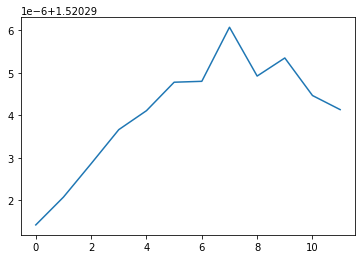

In [18]:
plt.plot(losses)

In [19]:
# присвоение класса [0,1] по предсказанной вероятности
y_pred = [1 if k > threshold else 0 for k in y_pred]

# точность модели
accuracy_score(y_train, y_pred)

0.15714285714285714

### Логистическая регрессия (Метод RMSProp)

In [20]:
EPOCHS = 12
LEARNING_RATE = 0.0001
gamma = 0.9
threshold = 0.5
e = 10**-6

losses = []
y_preds = []
vt_b = []
vt_w = []
w = np.random.randn(n)
b = np.random.randn()
Eg2_b = [0 for _ in range(len(X_train))]
Eg2_w = [0 for _ in range(len(X_train))]

for i in range(EPOCHS):
    # предсказание модели
    y_pred = np.array(sigmoid(-1*(X_train.dot(w.T) + b)))
    y_preds.append(y_pred)
                      
    # функция потерь
    log_loss = -np.sum(y_train * np.log(y_pred) + (1 - y_train) * np.log(1 - y_pred), axis=0) / len(y_train)
    losses.append(log_loss)
    
    i = np.random.choice(len(X_train))
    current_prediction = sigmoid(X_train[i].dot(w) + b)
    
    Eg2_b[i] = gamma * Eg2_b[i] + (1-gamma) * (np.sum(current_prediction- y_train[i]) / len(y_train)) **2
    Eg2_w[i] = gamma * Eg2_w[i] + (1-gamma) * (np.sum((current_prediction - y_train[i]) * X_train[i]) / len(y_train)) **2

    b -= (LEARNING_RATE * np.sum(current_prediction- y_train[i]) / len(y_train)) / np.sqrt(Eg2_b[i]+ e)
    w -= (LEARNING_RATE * np.sum(current_prediction- y_train[i]) / len(y_train) * X_train[i]) / np.sqrt(Eg2_b[i]+ e)

In [21]:
w, b

(array([ 0.22807042, -0.75778334]), 0.8762600105655293)

In [22]:
# predict_proba
y_pred

array([0.3665372 , 0.09746158, 0.13878295, 0.60134501, 0.17228077,
       0.39937194, 0.16564376, 0.47983565, 0.31614776, 0.10657293,
       0.08960867, 0.4448585 , 0.65052194, 0.20105683, 0.28778862,
       0.31612131, 0.42799956, 0.46831356, 0.18897097, 0.43528307,
       0.06979896, 0.3512209 , 0.06502983, 0.48145808, 0.07046848,
       0.19895605, 0.24952268, 0.61666533, 0.08094375, 0.47853622,
       0.69004196, 0.19241979, 0.33241683, 0.21321578, 0.60080872,
       0.41903748, 0.24277175, 0.72396386, 0.44058107, 0.56906899,
       0.18169789, 0.07569627, 0.23062853, 0.15353474, 0.18879768,
       0.63991439, 0.14476537, 0.11843968, 0.48096883, 0.73898905,
       0.62340781, 0.5448023 , 0.21518636, 0.24790019, 0.0627892 ,
       0.06990689, 0.05581715, 0.43742584, 0.60492683, 0.52196265,
       0.6757478 , 0.38695749, 0.06940099, 0.43920359, 0.19771319,
       0.81727258, 0.19183202, 0.61465864, 0.16740513, 0.14481296])

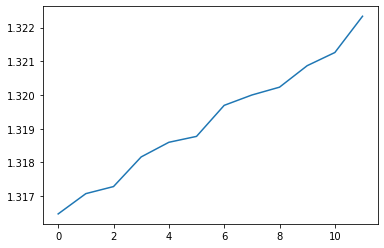

In [23]:
plt.plot(losses)

In [24]:
# присвоение класса [0,1] по предсказанной вероятности
y_pred = [1 if k > threshold else 0 for k in y_pred]

# точность модели
accuracy_score(y_train, y_pred)

0.3